<a href="https://colab.research.google.com/github/AYUSH-002/SPOTIFY-TOP50-ANALYSIS/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
%matplotlib inline

In [3]:
##Supress the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#convert the csv file into panda dataframe(df) for further analysis
df=pd.read_csv("spotify_top50_2021.csv",encoding="ISO-8859-1",index_col=[0])
#stripe whitespaces from header
df.columns=df.columns.str.strip()
#remove periods from headers
df.columns=df.columns.str.replace(",","")
#preview dataframe
df.head


<bound method NDFrame.head of           artist_name                                         track_name  \
id                                                                         
1      Olivia Rodrigo                                    drivers license   
2           Lil Nas X                     MONTERO (Call Me By Your Name)   
3       The Kid LAROI                          STAY (with Justin Bieber)   
4      Olivia Rodrigo                                           good 4 u   
5            Dua Lipa                          Levitating (feat. DaBaby)   
6       Justin Bieber             Peaches (feat. Daniel Caesar & Giveon)   
7            Doja Cat                           Kiss Me More (feat. SZA)   
8          The Weeknd                                    Blinding Lights   
9       Glass Animals                                         Heat Waves   
10          MÃ¥neskin                                            Beggin'   
11        Masked Wolf                             Astronau

In [5]:
#Linking up with the database
connectData=sqlite3.connect('database.db')
con=connectData.cursor()
#Cursor is used as we have to traverse row wise


In [6]:
#Creating a SQL table from the pandas datframe
df.to_sql("TopTrackss",connectData)

50

In [7]:
con.execute('''select* from TopTrackss;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.1370,143.875,242013,4
1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.7100,178.781,137704,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.4780,169.928,141806,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.6880,166.928,178147,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064,4
5,6,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),4iJyoBOLtHqaGxP12qzhQI,90,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,198082,4
6,7,Doja Cat,Kiss Me More (feat. SZA),3DarAbFujv6eYNliUTyqtz,88,0.764,0.705,8,-3.463,1,0.0284,0.25900,0.000089,0.1200,0.7810,110.970,208667,4
7,8,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
8,9,Glass Animals,Heat Waves,02MWAaffLxlfxAUY7c5dvx,94,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,238805,4
9,10,MÃ¥neskin,Beggin',3Wrjm47oTz2sjIgck11l5e,93,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,134.002,211560,4


In [8]:
# Searching for the most popular songs released this year by specific artists.
con.execute('''select artist_name,track_name,count(*) from TopTrackss group by artist_name order by count(*) desc;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,artist_name,track_name,count(*)
0,Olivia Rodrigo,drivers license,4
1,Doja Cat,Kiss Me More (feat. SZA),4
2,Bad Bunny,DÃKITI,3
3,The Weeknd,Blinding Lights,2
4,The Kid LAROI,STAY (with Justin Bieber),2
5,MÃ¥neskin,Beggin',2
6,Lil Nas X,MONTERO (Call Me By Your Name),2
7,Dua Lipa,Levitating (feat. DaBaby),2
8,BTS,Butter,2
9,Ariana Grande,positions,2


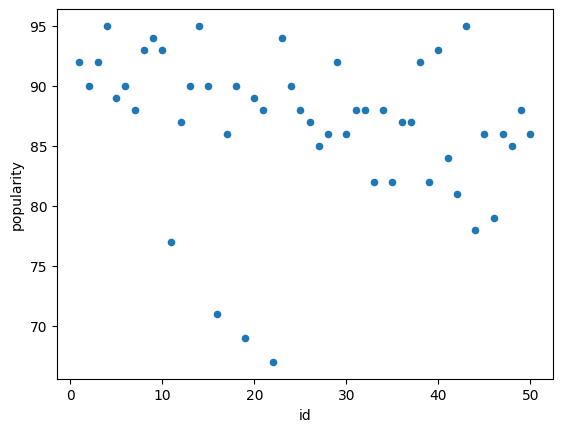

,id,artist_name,popularity
0,4,Olivia Rodrigo,95
1,14,Ed Sheeran,95
2,43,Doja Cat,95
3,9,Glass Animals,94
4,23,Bad Bunny,94
5,8,The Weeknd,93
6,10,MÃ¥neskin,93
7,40,Doja Cat,93
8,1,Olivia Rodrigo,92
9,3,The Kid LAROI,92


In [9]:
#Query to arrange the artists according to the popularity
con.execute('''select id,artist_name,popularity from TopTrackss order by popularity desc;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data.plot(x='id', y='popularity', kind='scatter')
plt.show()
data

In [11]:
# Searching for the most popular songs according to dancebility released this year by specific artists.
con.execute('''select avg(danceability)from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,avg(danceability)
0,0.68572


In [12]:
# Comapring the danceability of all the tracks with the average
con.execute('''select track_name,danceability ,
(case
when danceability > 0.68572 then 'Above Average'
when danceability = 0.68572 then 'Average'
when danceability < 0.68572 then 'Below average'
end)
as CompareAverage
from TopTrackss LIMIT 30;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,track_name,danceability,CompareAverage
0,drivers license,0.561,Below average
1,MONTERO (Call Me By Your Name),0.593,Below average
2,STAY (with Justin Bieber),0.591,Below average
3,good 4 u,0.563,Below average
4,Levitating (feat. DaBaby),0.702,Above Average
5,Peaches (feat. Daniel Caesar & Giveon),0.677,Below average
6,Kiss Me More (feat. SZA),0.764,Above Average
7,Blinding Lights,0.514,Below average
8,Heat Waves,0.761,Above Average
9,Beggin',0.714,Above Average


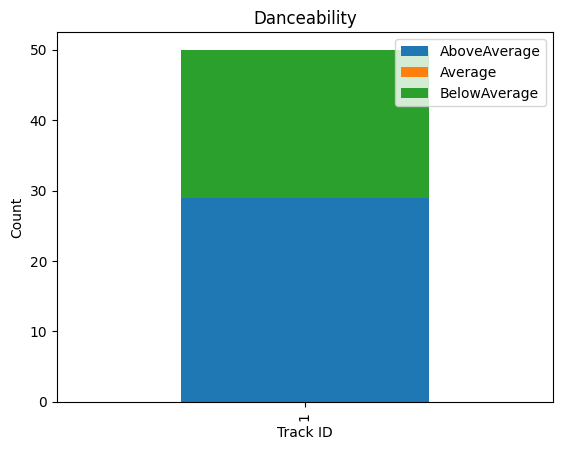

,id,AboveAverage,Average,BelowAverage
0,1,29,0,21


In [13]:
# Preparing the data from the last query for graphical display.
con.execute('''select id,
sum(case
when danceability > 0.68572 then 1
else 0
end) as AboveAverage,
sum(case
when danceability = 0.68572 then 1
else 0
end) as Average,
sum(case
when danceability < 0.68572 then 1
else 0
end)
as BelowAverage
from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data.plot(x="id", kind="bar", stacked=True)
plt.title("Danceability")
plt.xlabel("Track ID")
plt.ylabel("Count")
plt.show()
data

In [16]:
con.execute('''select avg(energy) from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,avg(energy)
0,0.64636


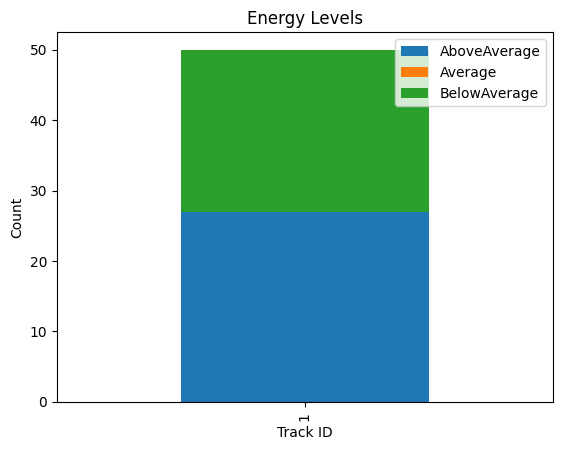

,id,AboveAverage,Average,BelowAverage
0,1,27,0,23


In [17]:
con.execute('''select id,
sum(case
when energy > 0.64636 then 1
else 0
end) as AboveAverage,
sum(case
when energy = 0.64636 then 1
else 0
end) as Average,
sum(case
when energy < 0.64636 then 1
else 0
end)
as BelowAverage
from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data.plot(x="id", kind="bar", stacked=True)
plt.title("Energy Levels")
plt.xlabel("Track ID")
plt.ylabel("Count")
plt.show()
data

In [19]:
con.execute('''select avg(loudness) from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,avg(loudness)
0,-5.90392


In [25]:
con.execute('''select track_name,loudness ,
(case
when danceability > -5.90392 then 'Above Average'
when danceability = -5.90392 then 'Average'
when danceability < -5.90392 then 'Below average'
end)
as CompareAverage
from TopTrackss LIMIT 30;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,track_name,loudness,CompareAverage
0,drivers license,-8.810,Above Average
1,MONTERO (Call Me By Your Name),-6.725,Above Average
2,STAY (with Justin Bieber),-5.484,Above Average
3,good 4 u,-5.044,Above Average
4,Levitating (feat. DaBaby),-3.787,Above Average
5,Peaches (feat. Daniel Caesar & Giveon),-6.181,Above Average
6,Kiss Me More (feat. SZA),-3.463,Above Average
7,Blinding Lights,-5.934,Above Average
8,Heat Waves,-6.900,Above Average
9,Beggin',-4.808,Above Average


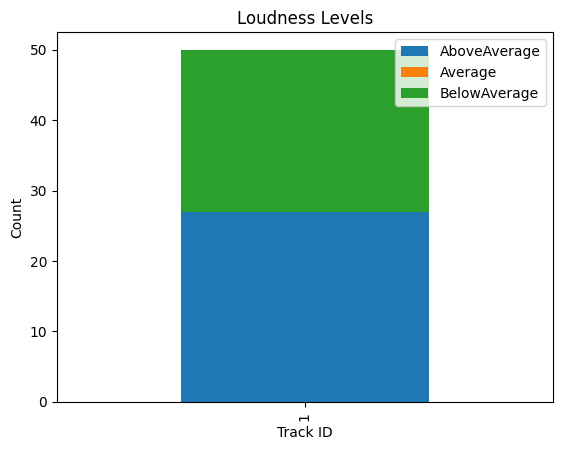

,id,AboveAverage,Average,BelowAverage
0,1,27,0,23


In [20]:
con.execute('''select id,
sum(case
when loudness > -5.90392 then 1
else 0
end) as AboveAverage,
sum(case
when loudness = -5.90392 then 1
else 0
end) as Average,
sum(case
when loudness < -5.90392 then 1
else 0
end)
as BelowAverage
from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data.plot(x="id", kind="bar", stacked=True)
plt.title("Loudness Levels")
plt.xlabel("Track ID")
plt.ylabel("Count")
plt.show()
data

In [23]:
con.execute('''select avg(speechiness) from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,avg(speechiness)
0,0.081374


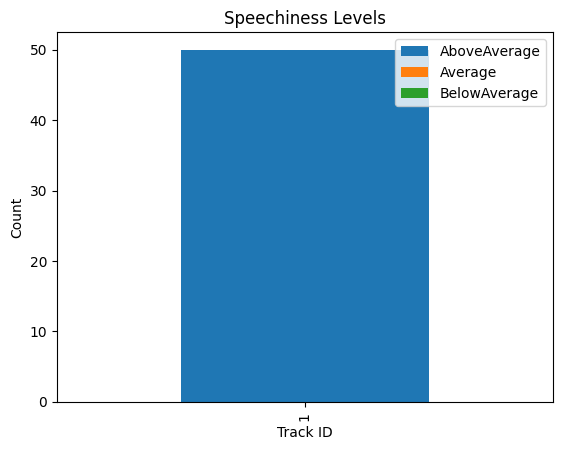

,id,AboveAverage,Average,BelowAverage
0,1,50,0,0


In [30]:
con.execute('''select id,
sum(case
when speechiness > -5.90392 then 1
else 0
end) as AboveAverage,
sum(case
when speechiness = -5.90392 then 1
else 0
end) as Average,
sum(case
when speechiness < -5.90392 then 1
else 0
end)
as BelowAverage
from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data.plot(x="id", kind="bar", stacked=True)
plt.title("Speechiness Levels")
plt.xlabel("Track ID")
plt.ylabel("Count")
plt.show()
data

In [28]:
con.execute('''select avg(liveness) from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,avg(liveness)
0,0.182292


In [31]:
con.execute('''select track_name,liveness ,
(case
when liveness > 0.081374 then 'Above Average'
when liveness = 0.081374 then 'Average'
when liveness < 0.081374 then 'Below average'
end)
as CompareAverage
from TopTrackss LIMIT 30;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data

,track_name,liveness,CompareAverage
0,drivers license,0.1060,Above Average
1,MONTERO (Call Me By Your Name),0.4050,Above Average
2,STAY (with Justin Bieber),0.1030,Above Average
3,good 4 u,0.0849,Above Average
4,Levitating (feat. DaBaby),0.0674,Below average
5,Peaches (feat. Daniel Caesar & Giveon),0.4200,Above Average
6,Kiss Me More (feat. SZA),0.1200,Above Average
7,Blinding Lights,0.0897,Above Average
8,Heat Waves,0.0921,Above Average
9,Beggin',0.3590,Above Average


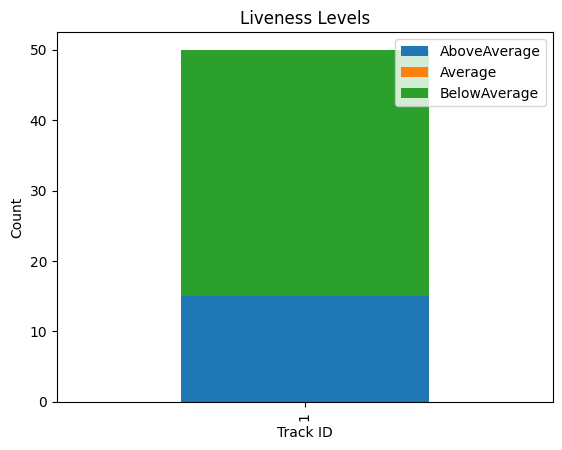

,id,AboveAverage,Average,BelowAverage
0,1,15,0,35


In [32]:
con.execute('''select id,
sum(case
when liveness > 0.182292 then 1
else 0
end) as AboveAverage,
sum(case
when liveness = 0.182292 then 1
else 0
end) as Average,
sum(case
when liveness < 0.182292 then 1
else 0
end)
as BelowAverage
from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data.plot(x="id", kind="bar", stacked=True)
plt.title("Liveness Levels")
plt.xlabel("Track ID")
plt.ylabel("Count")
plt.show()
data

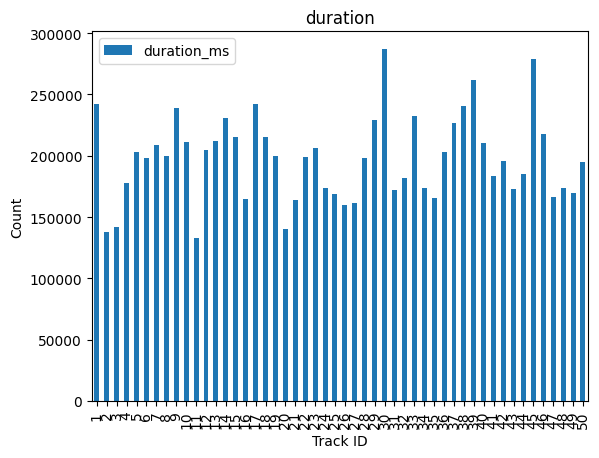

,id,track_name,duration_ms
0,1,drivers license,242013
1,2,MONTERO (Call Me By Your Name),137704
2,3,STAY (with Justin Bieber),141806
3,4,good 4 u,178147
4,5,Levitating (feat. DaBaby),203064
5,6,Peaches (feat. Daniel Caesar & Giveon),198082
6,7,Kiss Me More (feat. SZA),208667
7,8,Blinding Lights,200040
8,9,Heat Waves,238805
9,10,Beggin',211560


In [37]:
con.execute('''select id,track_name,duration_ms from TopTrackss ;''')
data=pd.DataFrame(con.fetchall())#Fetching all rows of SQL table
data.columns=[x[0] for x in con.description]
data.plot(x="id", kind="bar", stacked=True)
plt.title("duration")
plt.xlabel("Track ID")
plt.ylabel("Count")
plt.show()
data